## Задание:

... если вы в какой-то момент застряли, переходите к следующей задаче. 

Если не помогает, гляньте соседний ноутбук: python_numpy_tutorial.ipynb

Если совсем тяжело, посмотрите курс по Python (там же numpy и pandas) на Степике: https://stepik.org/course/Программирование-на-Python-67

##### 0. Нулевая задача: выполните эту ячейку:

In [1]:
# автоматическое отображение изображений в ноутбуке
%matplotlib inline

# чтобы писать np.array вместо numpy.array
import numpy as np

# plt - модуль для рисования графиков
import matplotlib.pyplot as plt

##### 1. (1 балл) Что больше, $\pi^e$ или $e^\pi$? Выведете результат $\pi^e > e^\pi$ 

Воспользуйтесь встроенными константами np.pi и np.e

In [12]:
print(np.pi ** np.e > np.e ** np.pi);

False


##### 2. (4 балла) Фильтрация элементов в массиве

(1 балл) Создайте массив из последовательности чисел от 1 до 10 (функция <a href="https://docs.scipy.org/doc/numpy/reference/generated/numpy.arange.html">np.arange</a>)

(1 балл) Выведите этот массив в обратном порядке. 

(1 балл) Выведите каждый второй элемент. 

(1 балл) Выведите элементы, большие числа 3. (<a href="https://docs.scipy.org/doc/numpy/reference/arrays.indexing.html">numpy indexing tutorial</a>)

In [51]:
arr = np.arange(1, 10)
print(arr[::-1])
print(arr[::2])
print(arr[arr > 3])

[9 8 7 6 5 4 3 2 1]
[1 3 5 7 9]
[4 5 6 7 8 9]


##### 3. (4 балла) Операции с массивами

(1 балл) Создайте 5 одномерных массивов длины 7: первый из единиц, второй из двоек и т.д.

(1 балл) Объедините массивы с помощью функции <a href="https://docs.scipy.org/doc/numpy/reference/generated/numpy.vstack.html">np.vstack</a> в матрицу A (на самом деле 2-мерный массив).

(1 балл) Сделайте копию А с помощью <a href="https://docs.scipy.org/doc/numpy/reference/generated/numpy.copy.html">np.copy</a> и назовите её B.

(1 балл) Вычислите <a href="https://ru.wikipedia.org/wiki/Умножение_матриц">матричное произведение</a> (оператор @) между матрицей A и B транспонированной (метод <a href="https://docs.scipy.org/doc/numpy-1.9.1/reference/generated/numpy.ndarray.T.html">.T</a>).

Выведите ответ.

In [48]:
arrays = list(map(lambda x: np.ones((7,), dtype=int) * x, range(1, 6)))
A = np.vstack(arrays)
B = np.copy(A)
A @ B.T

array([[  7,  14,  21,  28,  35],
       [ 14,  28,  42,  56,  70],
       [ 21,  42,  63,  84, 105],
       [ 28,  56,  84, 112, 140],
       [ 35,  70, 105, 140, 175]])

##### 4. (2 балла) Max / min

Найдите максимум и минимум массива A (методы <a href="https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.max.html">.max</a> и <a href="https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.min.html">.min</a> класса numpy.ndarray). Так же найдите максимумы в строках и столбцах (параметр axis).

In [64]:
print(A.max())
print(A.min())
print(A.max(axis=0))
print(A.max(axis=1))

5
1
[5 5 5 5 5 5 5]
[1 2 3 4 5]


##### 5. (6 баллов) Индексирование*
Напишите функцию, возвращающую максимальный элемент в векторе `x` среди элементов, перед которыми стоит число 0. <br>
Для `x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])` ответом является `5`. Если нулевых элементов нет, функция должна возвращать None.

Для решения можно использовать функцию <a href="https://docs.scipy.org/doc/numpy/reference/generated/numpy.where.html">np.where</a>. Эта функция может быть использована для получения индексов элементов в массиве, которые подчиняются логическому условию. Например:
`np.where(np.array([1, 4, 7, 5, 2]) % 2 == 0)[0]` возвращает индексы четных элементов: `array([1, 4])`

In [116]:
arr = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])
indexes = np.where(arr == 0)[0]
indexes = indexes[indexes < len(arr) - 1] + 1
print(max(arr[indexes]) if len(indexes) > 0 else 'None')

5


##### 6. (2 балла) Гистограмма значений
Превратите матрицу A в 1D массив с помощью метода <a href="https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.flatten.html">.flatten()</a> и выведите гистограмму значений результата с помощью функции <a href="https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.hist.html"> plt.hist()</a>. Она принимает на вход массив. Так же можно задать параметр `bins=100`, задающий количество столбиков гистограммы.

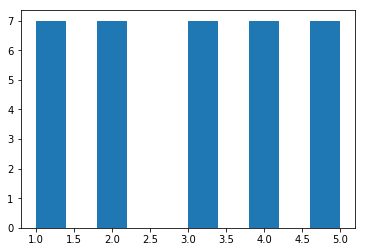

In [126]:
plt.hist(A.flatten());

##### 7. (6 баллов) Матожидание числа угадываний*

Игорь и Лена играют в игру: Лена загадала число от 1 до 100, а Игорь угадывает. Игорь может называть число, а Лена отвечает "да", если число угадано правильно, и "нет" если это не так. Дважды спрашивать про одно и то же число нельзя (и не имеет смысла).

За сколько в среднем попыток Игорь угадает число? Придумайте схему испытаний, проведите необходимое количество замеров. В ответе напишите матожидание (метод <a href="https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.mean.html">np.mean</a>), стандартное отклонение (метод <a href="https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.std.html">np.std</a>) и выведите гистограму полученных значений. 

<img src="http://imgs.xkcd.com/comics/psychic.png">